In [60]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
survey_results = pd.read_csv(filepath_or_buffer="data/survey_results_public.csv", header=0)

In [3]:
survey_results.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [4]:
def unique_a_b(series_a, series_b, second_col=True):
    series_a_arr = series_a.str.split(";")
    a_b = exploded_series_a = series_a_arr.explode().unique()
    if second_col:
        series_b_arr = series_b.str.split(";")
        exploded_series_b = series_b_arr.explode().unique()
        a_b = np.concatenate([exploded_series_a, exploded_series_b])
    unique_a_b = np.array([e for e in a_b if str(e) != 'nan'])
    return np.unique(unique_a_b)

def get_boolean_cols(df: pd.DataFrame, col_name, col_2_name):
    """
    Given dataframe and 2 column names, it will find uniques across the 2 column names and then create
    extra columns in a copy of the df that are booleans for each unique value as to whether the entry has it or not.
    Note: Can also pass in just 1 column name
    """
    series_a_arr = df[col_name].str.split(";")
    new_df = df.copy(deep=True)
    new_df[col_name] = series_a_arr
    col_2 = df[col_2_name] if col_2_name else None
    col_2_bool = True if col_2_name else None
    unique_values = unique_a_b(df[col_name], col_2, col_2_bool)
    for val in unique_values:
        new_df[f"{col_name}={val}"] = new_df.apply(lambda x: 1 if str(x[col_name]) != 'nan' and val in x[col_name] else 0, axis=1)
    return new_df
        


In [5]:
# example usage
lang_cols = get_boolean_cols(survey_results, "LanguageHaveWorkedWith", "LanguageWantToWorkWith")
lang_cols["LanguageHaveWorkedWith=Python"]

0        0
1        1
2        0
3        0
4        0
        ..
89179    0
89180    1
89181    1
89182    1
89183    0
Name: LanguageHaveWorkedWith=Python, Length: 89184, dtype: int64

In [6]:
survey_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [7]:
print(survey_results['Age'].unique())

['18-24 years old' '25-34 years old' '45-54 years old' '35-44 years old'
 'Under 18 years old' '55-64 years old' '65 years or older'
 'Prefer not to say']


In [8]:
survey_results = survey_results.drop('Q120', axis=1)

In [9]:
survey_results = survey_results.drop('SurveyLength', axis=1)

In [10]:
survey_results = survey_results.drop("SurveyEase",axis=1)
survey_results.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,Strongly agree,Agree,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0


In [11]:
onlineCourseAndCerts = get_boolean_cols(survey_results, "LearnCodeCoursesCert",col_2_name=False)


In [12]:
onlineCourseAndCerts.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Industry,ConvertedCompYearly,LearnCodeCoursesCert=Codecademy,LearnCodeCoursesCert=Coursera,LearnCodeCoursesCert=Other,LearnCodeCoursesCert=Pluralsight,LearnCodeCoursesCert=Skillsoft,LearnCodeCoursesCert=Udacity,LearnCodeCoursesCert=Udemy,LearnCodeCoursesCert=edX
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,[Other],...,"Information Services, IT, Software Development...",285000.0,0,0,1,0,0,0,0,0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,"Information Services, IT, Software Development...",250000.0,0,0,0,0,0,0,0,0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,NaN,156000.0,0,0,0,0,0,0,0,0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,"[Other, Codecademy, edX]",...,Other,23456.0,1,0,1,0,0,0,0,1


In [13]:
survey_results['Country'].unique()

array([nan, 'United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       '

In [14]:
lang_cols = get_boolean_cols(survey_results, "LanguageWantToWorkWith", "LanguageHaveWorkedWith")
lang_cols = get_boolean_cols(lang_cols, "LanguageHaveWorkedWith", "LanguageWantToWorkWith")
lang_cols

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,LanguageHaveWorkedWith=Rust,LanguageHaveWorkedWith=SAS,LanguageHaveWorkedWith=SQL,LanguageHaveWorkedWith=Scala,LanguageHaveWorkedWith=Solidity,LanguageHaveWorkedWith=Swift,LanguageHaveWorkedWith=TypeScript,LanguageHaveWorkedWith=VBA,LanguageHaveWorkedWith=Visual Basic (.Net),LanguageHaveWorkedWith=Zig
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,0,0,0,0,0,0,0,0,0,0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,0,0,1,0,0,0,1,0,0,0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,...,0,0,1,0,0,0,1,0,0,0
89180,89181,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,...,0,0,1,0,0,0,0,0,0,0
89181,89182,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,...,1,0,1,0,0,0,0,0,0,0
89182,89183,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,...,0,0,1,0,1,0,0,0,0,0


In [15]:
lang_data = []
for lang in unique_a_b(survey_results["LanguageWantToWorkWith"], survey_results["LanguageHaveWorkedWith"]):
    worked_with  = len(lang_cols[lang_cols[f"LanguageHaveWorkedWith={lang}"] == 1])
    still_want = len(lang_cols[lang_cols[f"LanguageHaveWorkedWith={lang}"] == 1][lang_cols[f"LanguageWantToWorkWith={lang}"] == 1])
    prop = still_want/worked_with
    lang_data.append([lang, worked_with, still_want, prop])

/var/folders/6_/c68mr5wx1xz8wp1g177rf99r0000gn/T/ipykernel_15564/3959335837.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  still_want = len(lang_cols[lang_cols[f"LanguageHaveWorkedWith={lang}"] == 1][lang_cols[f"LanguageWantToWorkWith={lang}"] == 1])


In [16]:
(unique_a_b(survey_results["LanguageWantToWorkWith"], survey_results["LanguageHaveWorkedWith"]))

array(['APL', 'Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C',
       'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi',
       'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go',
       'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia',
       'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'OCaml', 'Objective-C',
       'PHP', 'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Raku',
       'Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift',
       'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig'], dtype='<U23')

In [69]:
lang_data_df = pd.DataFrame(lang_data, columns=["Language", "worked-with", "still-want", "proportion-worked-to-still-want"])
lang_data_df = lang_data_df.sort_values(by="proportion-worked-to-still-want")

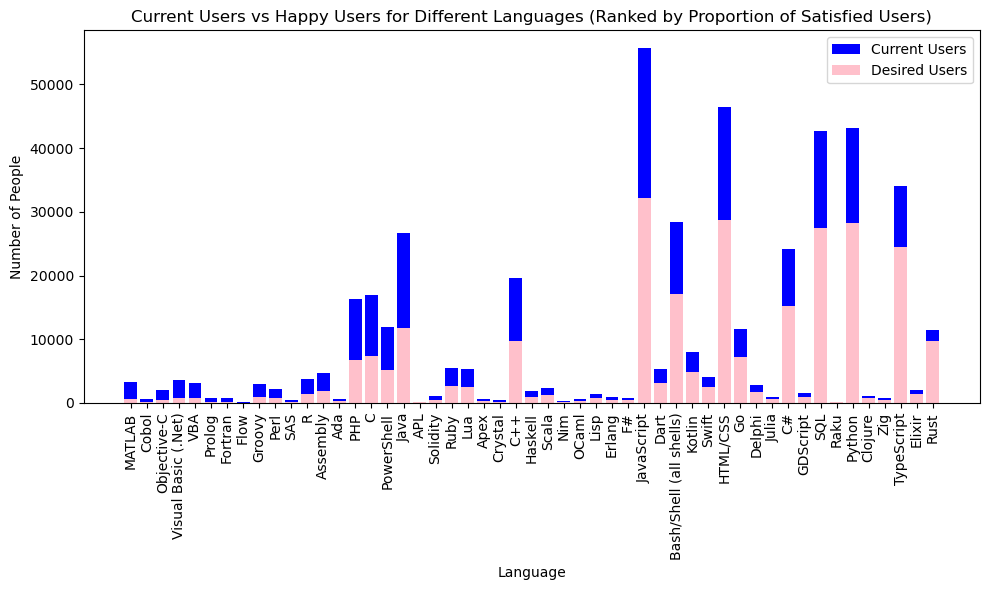

In [72]:
plt.figure(figsize=(10, 6))

# Plotting bars for current users in blue
plt.bar(lang_data_df['Language'], lang_data_df['worked-with'], color='blue', label='Current Users')

# Plotting bars for those who want to use the language in orange
plt.bar(lang_data_df['Language'], lang_data_df['still-want'], color='pink', label='Desired Users')

plt.xlabel('Language')
plt.ylabel('Number of People')
plt.title('Current Users vs Happy Users for Different Languages (Ranked by Proportion of Satisfied Users)')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if there are many languages
plt.legend()  # Show legend

plt.tight_layout()
plt.show()







In [76]:
lang_cols_by_comp = lang_cols.sort_values(by='ConvertedCompYearly')
lang_cols_by_comp

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,LanguageHaveWorkedWith=Rust,LanguageHaveWorkedWith=SAS,LanguageHaveWorkedWith=SQL,LanguageHaveWorkedWith=Scala,LanguageHaveWorkedWith=Solidity,LanguageHaveWorkedWith=Swift,LanguageHaveWorkedWith=TypeScript,LanguageHaveWorkedWith=VBA,LanguageHaveWorkedWith=Visual Basic (.Net),LanguageHaveWorkedWith=Zig
8862,8863,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Hobby;Professional development or self-paced l...,Primary/elementary school,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Pluralsight;Coursera,...,0,0,0,0,0,0,0,0,0,0
55664,55665,I am a developer by profession,35-44 years old,"Employed, full-time",In-person,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;Coding Bootcamp,NaN,edX,...,0,0,0,0,0,0,0,0,0,0
54023,54024,I am a developer by profession,35-44 years old,I prefer not to say,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Formal documentation provided by the owner of ...,Udemy;Pluralsight,...,0,0,1,0,0,0,1,0,0,0
63213,63214,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Other,...,0,0,1,0,0,0,0,0,0,0
13708,13709,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Online Courses or Certi...,Blogs with tips and tricks;How-to videos;Video...,Coursera,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,...,0,0,1,0,0,0,1,0,0,0
89180,89181,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,...,0,0,1,0,0,0,0,0,0,0
89181,89182,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,...,1,0,1,0,0,0,0,0,0,0
89182,89183,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,...,0,0,1,0,1,0,0,0,0,0


In [36]:
online_learners = get_boolean_cols(survey_results, "LearnCode", None)

In [73]:
# LearnCode=Other online resources (e.g., videos, blogs, forum)
online_learners = online_learners[(online_learners["LearnCode=Online Courses or Certification"] == 1)]

In [40]:
online_learners = get_boolean_cols(online_learners, "LanguageWantToWorkWith", None)

AttributeError: Can only use .str accessor with string values!

In [43]:
online_learners["LearnCode=Online Courses or Certification"]


1        1
4        1
5        1
6        1
7        1
        ..
89179    1
89180    1
89181    1
89182    1
89183    1
Name: LearnCode=Online Courses or Certification, Length: 43201, dtype: int64

In [65]:
want_language = {}
j = 0
language_names = []
sum_values = []

# Assuming online_learners is a DataFrame
for i in online_learners.columns:
    if "LanguageWantToWorkWith=" in i:
        language_names.append(i)
        sum_value = online_learners[i].sum()
        sum_values.append(sum_value)

want_language['Language'] = language_names  
want_language['Sum'] = sum_values

want_df = pd.DataFrame(want_language)
want_df = want_df.sort_values(by='Sum')
want_df['Language'] = want_df['Language'].str.replace('LanguageWantToWorkWith=', '')
want_df


,Language,Sum
39,Raku,104
16,Flow,112
0,APL,183
17,Fortran,210
9,Cobol,216
36,Prolog,218
42,SAS,232
10,Crystal,270
1,Ada,296
2,Apex,312


The most desired languages to work with among those who have taken online courses are very similar to the languages that are the most popular among people who already use them, particularly Rust, TypeScript, Python which are in the top 6 of both rankings and are also by far the most popular in the upper end of the rankings of the satisfaction list since Zig, Elixir, and Clojure had hardly any users in the survey, making them less relevant for the purposes of marketing a new course.

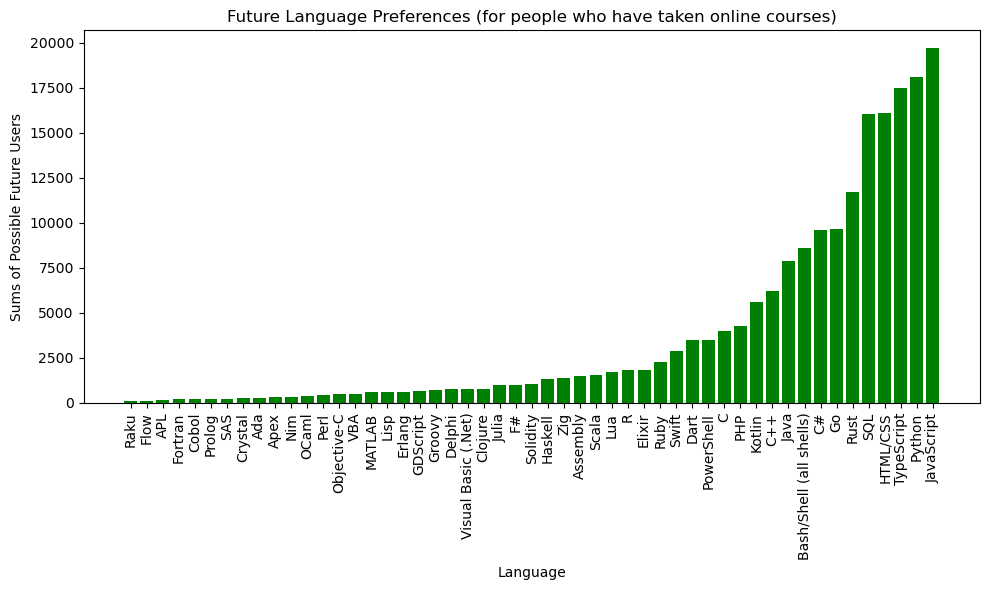

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(want_df['Language'], want_df['Sum'], color='green')
plt.xlabel('Language')
plt.ylabel('Sums of Possible Future Users')
plt.title('Future Language Preferences (for people who have taken online courses)')

# Rotating x-axis labels for better readability if there are many languages
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()